In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#reading dataset
df = pd.read_csv("/content/drive/MyDrive/Untitled folder/Amazon_Unlocked_Mobile.csv")
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [ ]:
print("Summary statistics of numerical features : \n", df.describe())

print("\nTotal number of reviews: ",len(df))
print("\nTotal number of brands: ", len(list(set(df['Brand Name']))))
print("\nTotal number of unique products: ", len(list(set(df['Product Name']))))

print("\nPercentage of reviews with neutral sentiment : {:.2f}%"\
      .format(df[df['Rating']==3]["Reviews"].count()/len(df)*100))
print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(df[df['Rating']>3]["Reviews"].count()/len(df)*100))
print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(df[df['Rating']<3]["Reviews"].count()/len(df)*100))

Summary statistics of numerical features : 
                Price         Rating   Review Votes
count  407907.000000  413840.000000  401544.000000
mean      226.867155       3.819578       1.507237
std       273.006259       1.548216       9.163853
min         1.730000       1.000000       0.000000
25%        79.990000       3.000000       0.000000
50%       144.710000       5.000000       0.000000
75%       269.990000       5.000000       1.000000
max      2598.000000       5.000000     645.000000

Total number of reviews:  413840

Total number of brands:  385

Total number of unique products:  4410

Percentage of reviews with neutral sentiment : 7.68%

Percentage of reviews with positive sentiment : 68.86%

Percentage of reviews with negative sentiment : 23.45%


In [ ]:
df.dtypes

Product Name     object
Brand Name       object
Price           float64
Rating            int64
Reviews          object
Review Votes    float64
dtype: object

In [ ]:
df.isna().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [ ]:
Avg_Rating=df.groupby(by='Brand Name').mean()[0:5]

In [ ]:
Avg_Rating["Rating"]

Brand Name
AMM Global Enterprises    4.888889
ARGOM TECH                3.000000
ASUS                      4.470085
ASUS Computers            4.028249
AT&T                      5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Avg Rating Graph')

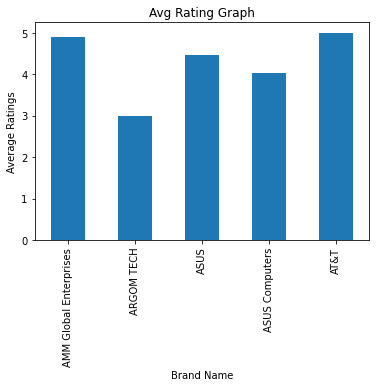

In [ ]:
Avg_Rating["Rating"].plot(kind='bar')
plt.xlabel("Brand Name")
plt.ylabel("Average Ratings")
plt.title("Avg Rating Graph")

Text(0, 0.5, 'Count')

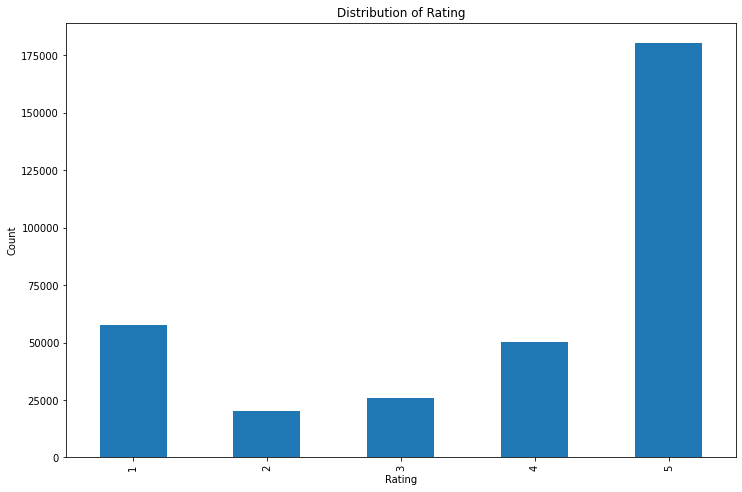

In [ ]:
# Ploting distribution of rating
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 20 Brands')

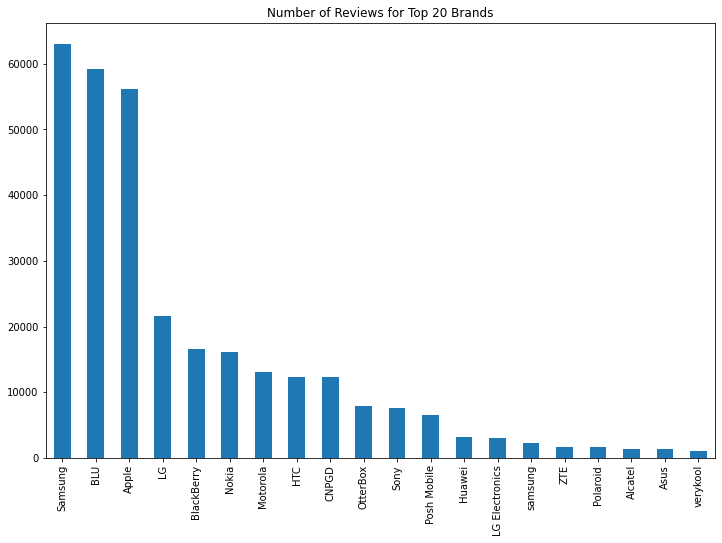

In [ ]:
brands = df["Brand Name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")

Text(0, 0.5, 'Count')

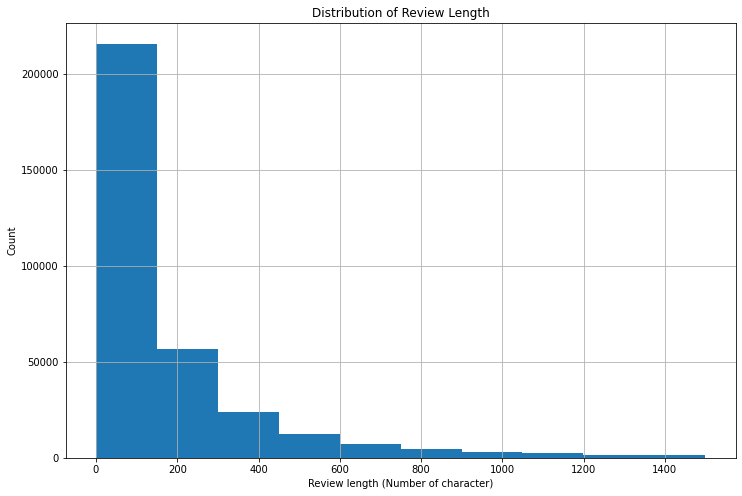

In [ ]:
review_length = df["Reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [ ]:
# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]
# Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['Sentiment'] = np.where(df['Rating'] > 3, 1, 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1
...,...,...,...,...,...,...,...
413832,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,good rugged phone that has a long-lasting batt...,0.0,1
413834,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1,used hard,0.0,0
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0,1
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Sentiment'], \
                                                    test_size=0.1,)
print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_test.iloc[10]

Load 277449 training examples and 30828 validation examples. 

Show a review in the training set : 
 Opyou are the first person i bought a iphone from! I love this when i got it it looked like it was brand new! Even though it had scratchs i cant get over it!


'I have not had this phone long but, it is all I need. I can easily make and receive calls and text. I do not need Pokeman GO. LOL So far this phone has been satisfactory.'

In [ ]:
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup
from nltk.stem import SnowballStemmer
import re 
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
  text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
  letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
  words = letters_only.lower().split()
  if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
  if stemming==True:
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(w) for w in words]
  if split_text==True:
    return (words)
  return( " ".join(words))

In [ ]:
X_train_cleaned = []
X_test_cleaned = []
for d in X_train:
    X_train_cleaned.append(cleanText(d))
print(' cleaned review in the training set : \n',  X_train_cleaned[10])
for d in X_test:
    X_test_cleaned.append(cleanText(d))

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.amazon.com/gp/product/B013YDFH3Y?redirect=true&ref_=cm_cr_ryp_prd_ttl_sol_0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://www.amazon.com/dp/B00K15KRV6/ref=cm_cr_ryp_prd_ttl_sol_22" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://www.amazon.com/dp/B00QF5QJR2/ref=cm_cr_ryp_prd_ttl_sol_0" looks like a URL. Beautiful Soup is not an HTTP client. You should probab

 cleaned review in the training set : 
 opyou are the first person i bought a iphone from i love this when i got it it looked like it was brand new even though it had scratchs i cant get over it


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("some feature names : \n", tfidf.get_feature_names()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

Number of features : 19755 

some feature names : 
 ['00', 'a4', 'articulos', 'brags', 'comenso', 'dashboard', 'drew', 'explorer', 'generation', 'hurried', 'karen', 'mass', 'north', 'phonecase', 'quantity', 'ringer', 'sistem', 'supervisors', 'trapped', 'waisting']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['not' 'return' 'disappointed' 'waste' 'horrible' 'worst' 'poor' 'stopped'
 'slow' 'doesn']

Top 10 features with largest coefficients : 
['great' 'love' 'excellent' 'perfect' 'good' 'easy' 'best' 'amazing' 'far'
 'price']


In [ ]:
predictions = lr.predict(tfidf.transform(X_test_cleaned))
from sklearn.metrics import accuracy_score
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))


Accuracy on validation set: 0.9281


In [ ]:
predictions = lr.predict(tfidf.transform(X_train_cleaned+X_test_cleaned))
X=X_train+X_test
y_hats_df = pd.DataFrame(data = predictions, columns = ['Predictions'], index = X.index.copy())
df_out = pd.merge(df, y_hats_df, how = 'left', left_index = True, right_index = True)
df_out

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment,Predictions
134801,BLU Studio 5.0 C HD - Unlocked Cell Phones - R...,BLU,2000.00,5,"For the price I paid for this devices, its fan...",0.0,1,0
123493,Blu LIFE 8 Unlocked (Pink),BLU,199.98,5,love love love it....good buy...recommend to a...,0.0,1,1
335592,Samsung Galaxy S Duos II S7582 DUAL SIM Factor...,Samsung,299.99,4,Good,0.0,1,1
246353,"Motorola Droid 2 A955 Verizon Phone 5MP Cam, W...",Motorola,82.00,1,Not good. Returned first phone and they sent m...,0.0,0,1
273324,Nokia Lumia 920 32GB Unlocked GSM 4G LTE Windo...,Nokia,149.35,4,Met expectations! I'm very satisfied!Even arri...,1.0,1,0
...,...,...,...,...,...,...,...,...
336011,Samsung Galaxy S Duos II S7582 DUAL SIM Factor...,Samsung,299.99,4,excellent,0.0,1,0
154541,BLU Studio Selfie - Smartphone - GSM Unlocked ...,BLU,2000.00,2,Served its purpose but the camera is terrible!,0.0,0,1
397667,Sony Xperia Z5 Compact E5823 2GB/32GB 23MP 4.6...,Sony,429.89,5,The best cellphone ever.,0.0,1,1
88025,BlackBerry Bold 9700 Unlocked GSM 3G World Pho...,BlackBerry,101.99,4,This is an excellent phone for a blackberry. U...,1.0,1,1


In [ ]:
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
def create_word_cloud(brand, sentiment):
  df_brand = df.loc[df['Brand Name'].isin([brand])]
  df_brand_sample = df_brand.sample(frac=0.1)
  word_cloud_collection = ''
  if sentiment == 1:
    df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==1]["Reviews"]
  if sentiment == 0:
    df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==0]["Reviews"]
  for val in df_reviews.str.lower():
    tokens = nltk.word_tokenize(val)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
      word_cloud_collection = word_cloud_collection + words + ' '
  wordcloud = WordCloud(max_font_size=50, width=500, height=300).generate(word_cloud_collection)
  plt.figure(figsize=(20,20))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


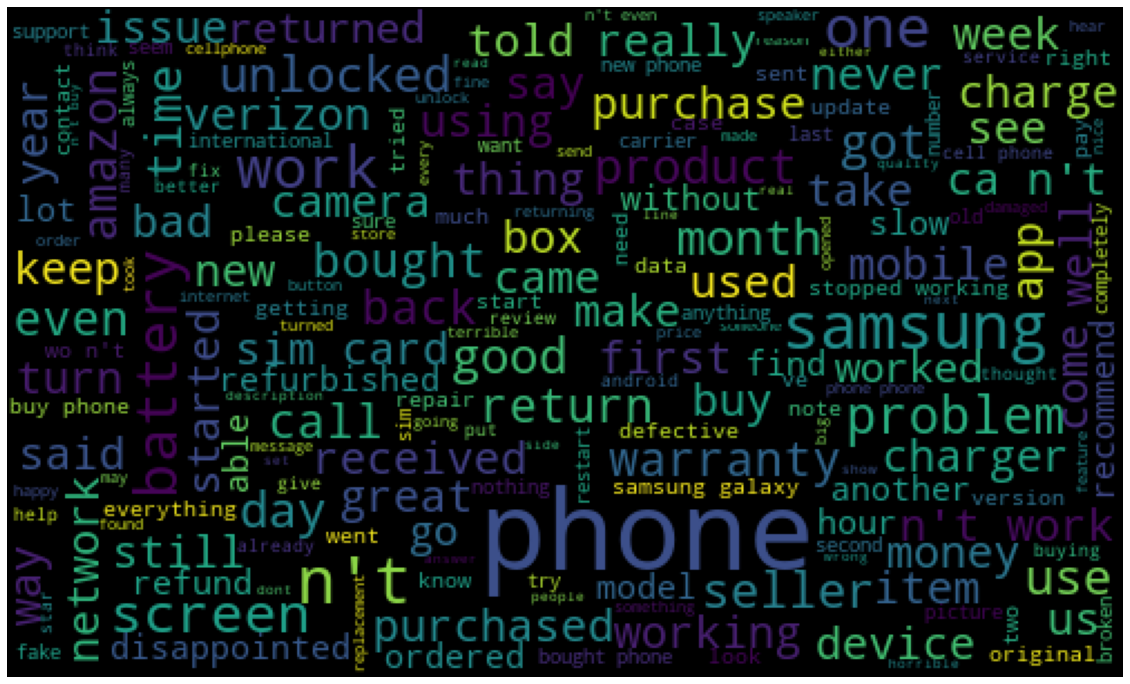

In [ ]:
create_word_cloud(brand='Samsung',sentiment=0)